In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.shape

(1095, 20)

In [7]:
deliveries.shape

(183035, 17)

In [8]:
matches['team1'].value_counts()

,count
team1,
Royal Challengers Bangalore,135
Chennai Super Kings,128
Mumbai Indians,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Kings XI Punjab,92
Sunrisers Hyderabad,86
Delhi Daredevils,85
Delhi Capitals,41


In [9]:
matches['team2'].value_counts()

,count
team2,
Mumbai Indians,138
Kolkata Knight Riders,130
Rajasthan Royals,120
Chennai Super Kings,110
Royal Challengers Bangalore,105
Kings XI Punjab,98
Sunrisers Hyderabad,96
Delhi Daredevils,76
Delhi Capitals,50


In [10]:
deliveries['batting_team'].value_counts()

,count
batting_team,
Mumbai Indians,23221
Kings XI Punjab,21425
Royal Challengers Bangalore,21359
Kolkata Knight Riders,21352
Chennai Super Kings,20243
Delhi Daredevils,18786
Rajasthan Royals,17783
Sunrisers Hyderabad,13352
Deccan Chargers,9034


In [11]:
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)


<ipython-input-11-f4d1ee4b8257>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
<ipython-input-11-f4d1ee4b8257>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [12]:
matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

In [13]:
matches['team2'].value_counts()

,count
team2,
Mumbai Indians,138
Kolkata Knight Riders,130
Rajasthan Royals,120
Royal Challengers Bangalore,111
Chennai Super Kings,110
Kings XI Punjab,98
Sunrisers Hyderabad,96
Delhi Daredevils,76
Delhi Capitals,50


In [14]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [15]:
deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
deliveries['bowling_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

deliveries['batting_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
deliveries['bowling_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

<ipython-input-15-95aa4c7cf1ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
<ipython-input-15-95aa4c7cf1ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [16]:
deliveries['batting_team'].value_counts()

,count
batting_team,
Mumbai Indians,23221
Kings XI Punjab,21425
Royal Challengers Bangalore,21359
Kolkata Knight Riders,21352
Chennai Super Kings,20243
Delhi Daredevils,18786
Rajasthan Royals,17783
Sunrisers Hyderabad,13352
Deccan Chargers,9034


In [17]:
matches['city'].isna().sum()

np.int64(51)

In [18]:
matches['method'].value_counts()

,count
method,
D/L,21


In [19]:
matches['city'].fillna('Unknown',inplace=True)
matches['method'].fillna('Non D/L',inplace=True)

<ipython-input-19-2253e66ac9a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Unknown',inplace=True)
<ipython-input-19-2253e66ac9a7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [20]:
def random_colors(no_of_colors):
    return ['#'+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)]) for _ in range(no_of_colors)]

In [21]:
random_colors(6)

['#6A8A2C', '#D61F61', '#A8B864', '#5010C9', '#17CC97', '#9E2108']

<ipython-input-22-44f37f6859a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values, palette=random_colors(len(success_ratio_desc)))


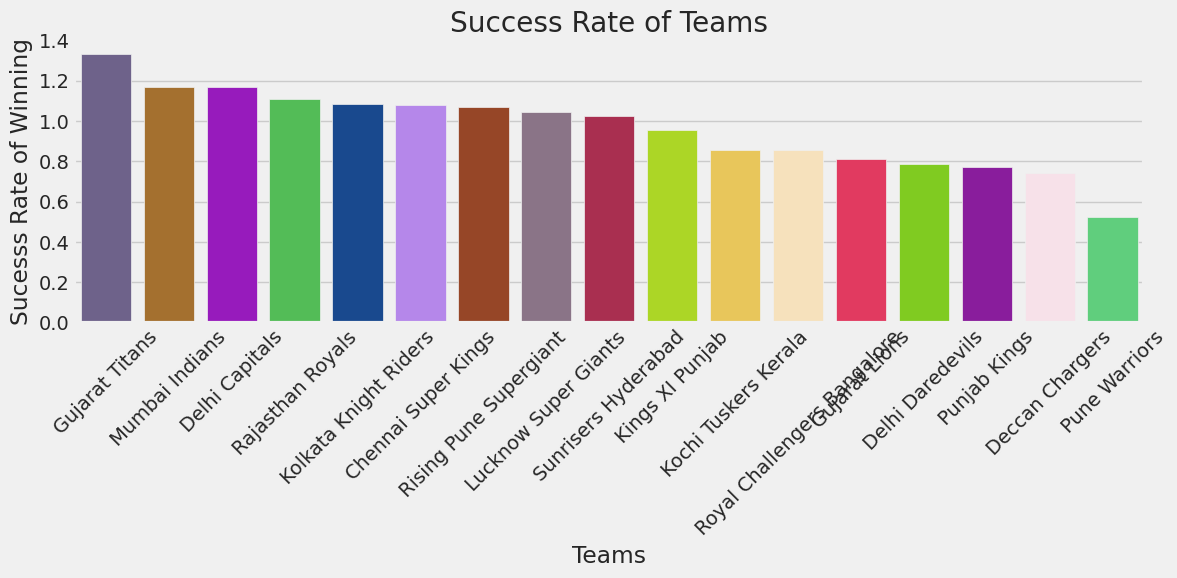

In [22]:
success_ratio = matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id']
success_ratio_desc = success_ratio.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values, palette=random_colors(len(success_ratio_desc)))
plt.title('Success Rate of Teams')
plt.xlabel('Teams')
plt.ylabel('Sucesss Rate of Winning')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<ipython-input-23-ec527deb8ebf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index,y=winner_counts.values, palette=random_colors(len(winner_counts)))


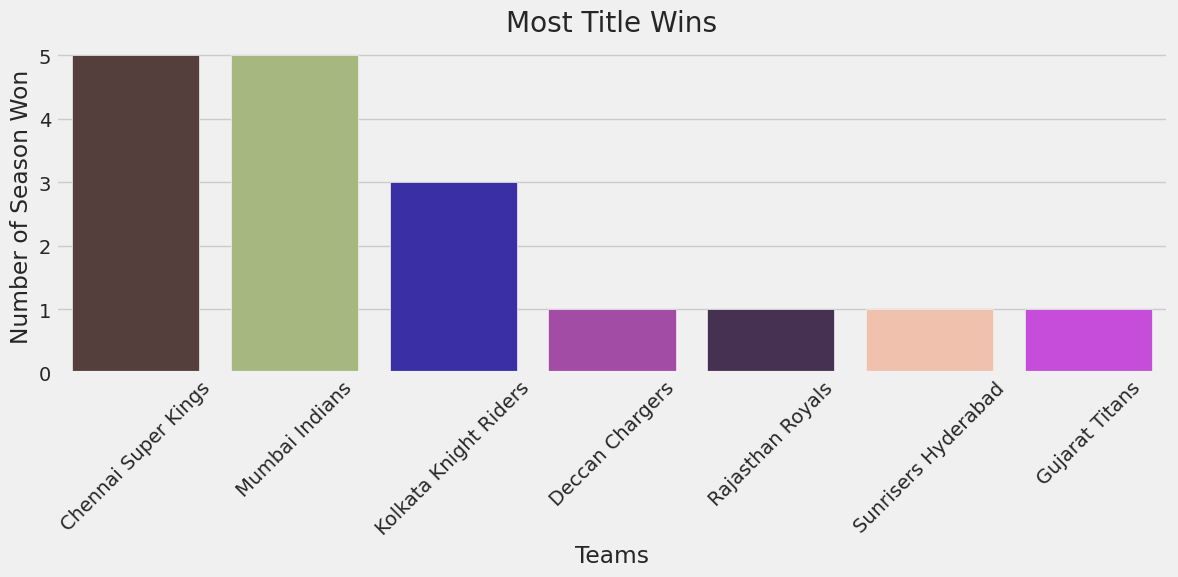

In [23]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()


plt.figure(figsize=(12,6))
sns.barplot(x=winner_counts.index,y=winner_counts.values, palette=random_colors(len(winner_counts)))
plt.title('Most Title Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Season Won')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<ipython-input-24-2f2ea13e0417>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batter',y='Runs', data= top_batsmen, palette=random_colors(10))


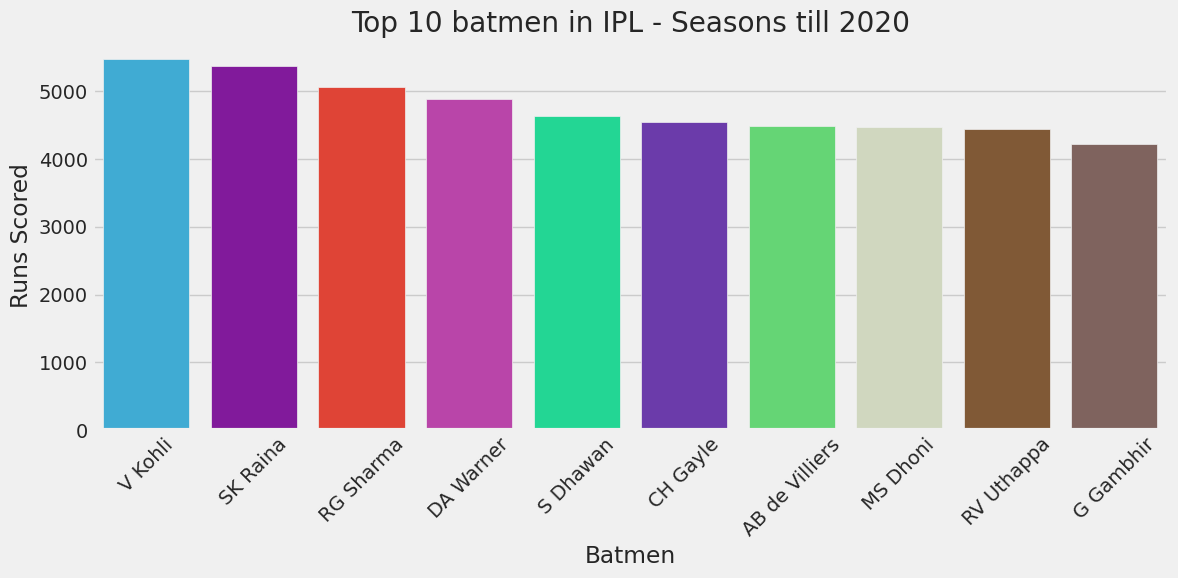

In [24]:
batting_tot = deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')
top_batsmen = batting_tot.sort_values(by='Runs',ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(x='batter',y='Runs', data= top_batsmen, palette=random_colors(10))
plt.title('Top 10 batmen in IPL - Seasons till 2020')
plt.xlabel('Batmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [25]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN


In [26]:
batting_ings = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name='Innings Runs')
top_batsmen_scores = batting_ings.sort_values(by='Innings Runs',ascending=False)[:10]

In [27]:
batsman_ball_faced = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].count().reset_index(name='Balls Faced')

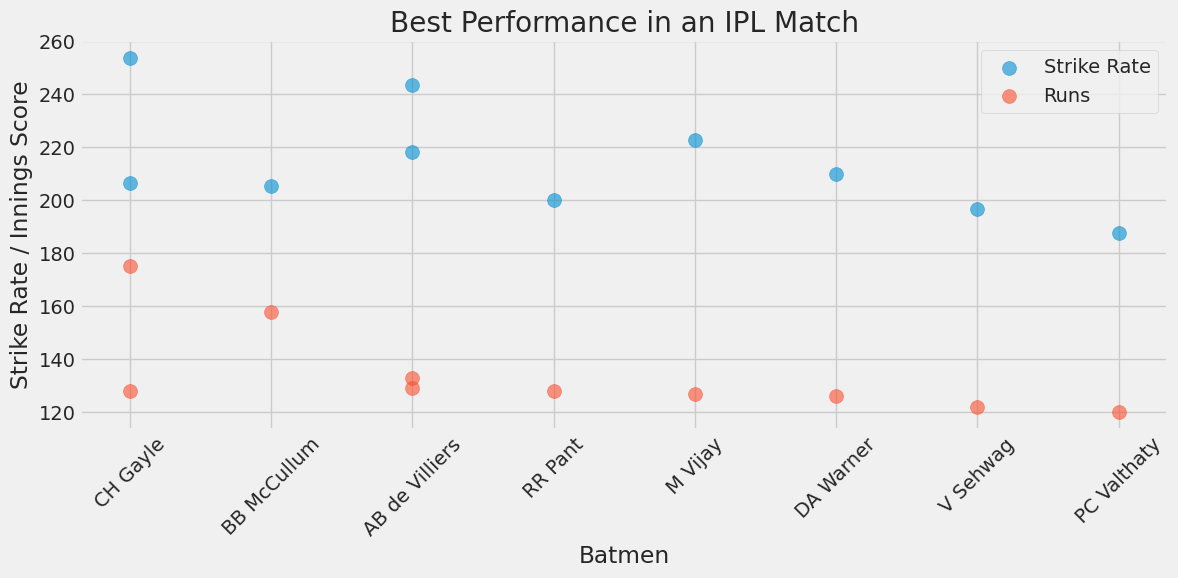

In [28]:
batsmen_performance = pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner', on=['match_id','batter'])
batsmen_performance['Strike Rate for Match'] = np.round(batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced'],2)
batsmen_performance

plt.figure(figsize=(12,6))
plt.scatter(batsmen_performance['batter'],batsmen_performance['Strike Rate for Match'], label='Strike Rate',s=100, alpha=0.6)
plt.scatter(batsmen_performance['batter'],batsmen_performance['Innings Runs'], label='Runs',s=100, alpha=0.6)
plt.title('Best Performance in an IPL Match')
plt.xlabel('Batmen')
plt.ylabel('Strike Rate / Innings Score')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

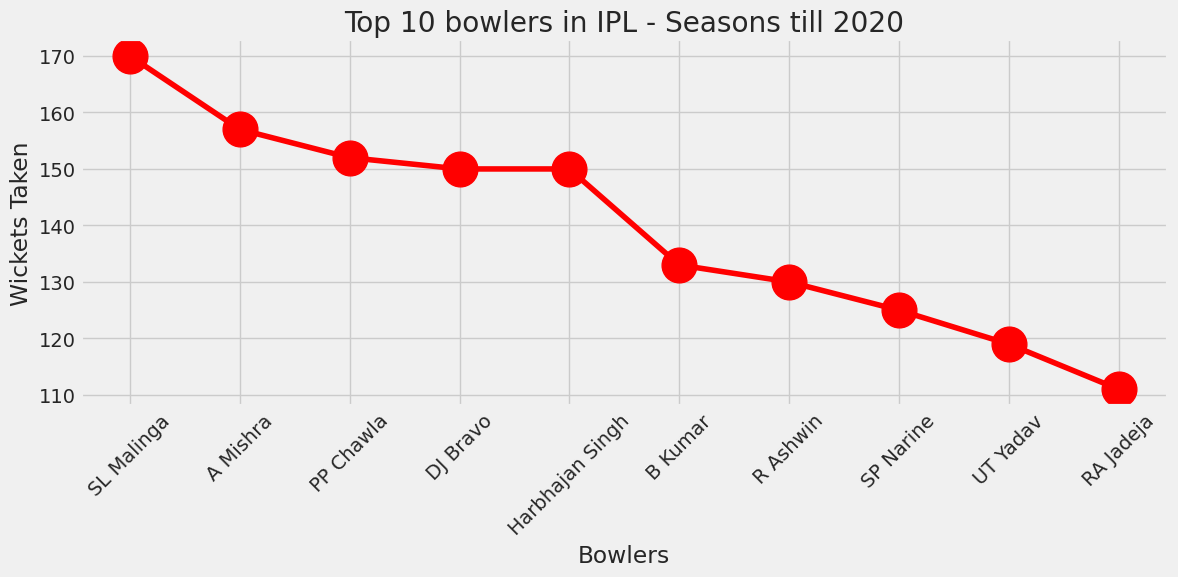

In [29]:
bowling_wickets = deliveries[deliveries['dismissal_kind'] != 'run out']
top_bowlers = bowling_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'], marker= 'o',color='red',ms=25)
plt.title('Top 10 bowlers in IPL - Seasons till 2020')
plt.xlabel('Bowlers')
plt.ylabel('Wickets Taken')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [30]:
match_bowling_top = bowling_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(
    name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

In [31]:
match_bowler_runs = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Conceded')

In [32]:
match_bowler_performance = pd.merge(match_bowler_runs,match_bowling_top,how='inner', on =['match_id','bowler'])

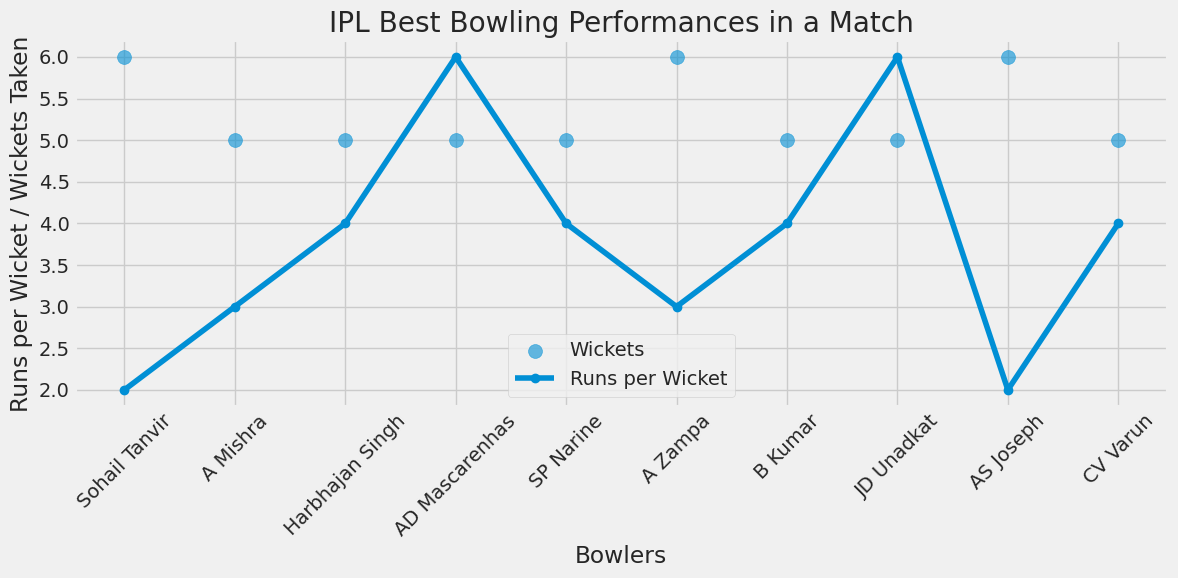

In [33]:
match_bowler_performance['Runs per Wicket'] = np.round(match_bowler_performance['Runs Conceded']/match_bowler_performance['Wickets'],0)


plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets'],label='Wickets',s=100,alpha=0.6)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per Wicket'],marker='o',label='Runs per Wicket')
plt.title('IPL Best Bowling Performances in a Match')
plt.xlabel('Bowlers')
plt.ylabel('Runs per Wicket / Wickets Taken')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

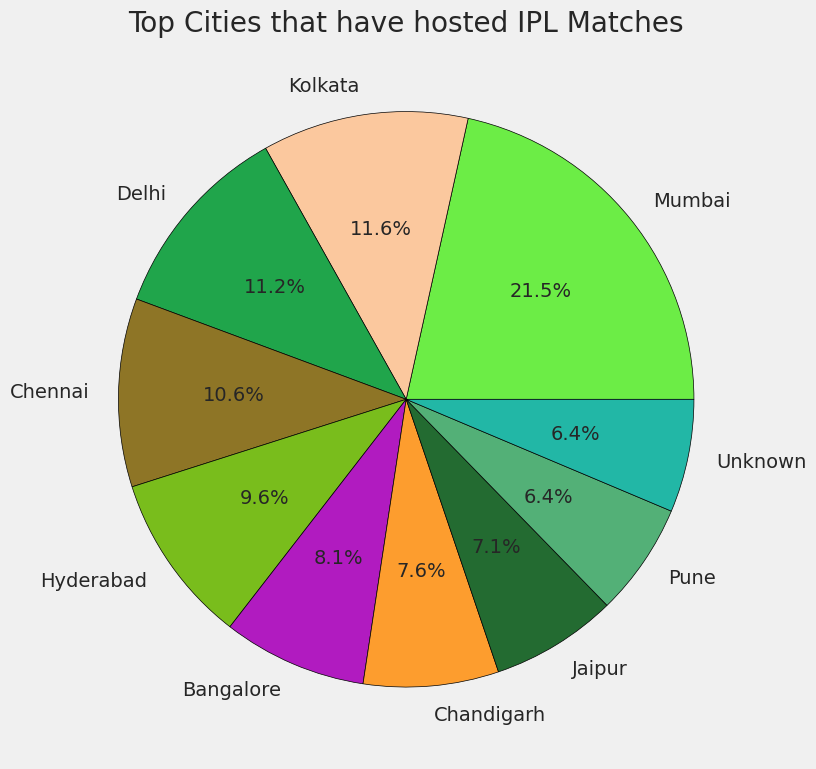

In [34]:
top_cities = matches['city'].value_counts().reset_index(name='Match Count')[:10]

plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Count'], labels = top_cities['city'],colors=random_colors(10),
       autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()

<ipython-input-35-ff24090eb061>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dismissal_kind',data=deliveries,palette=random_colors(len(deliveries['dismissal_kind'].value_counts())))


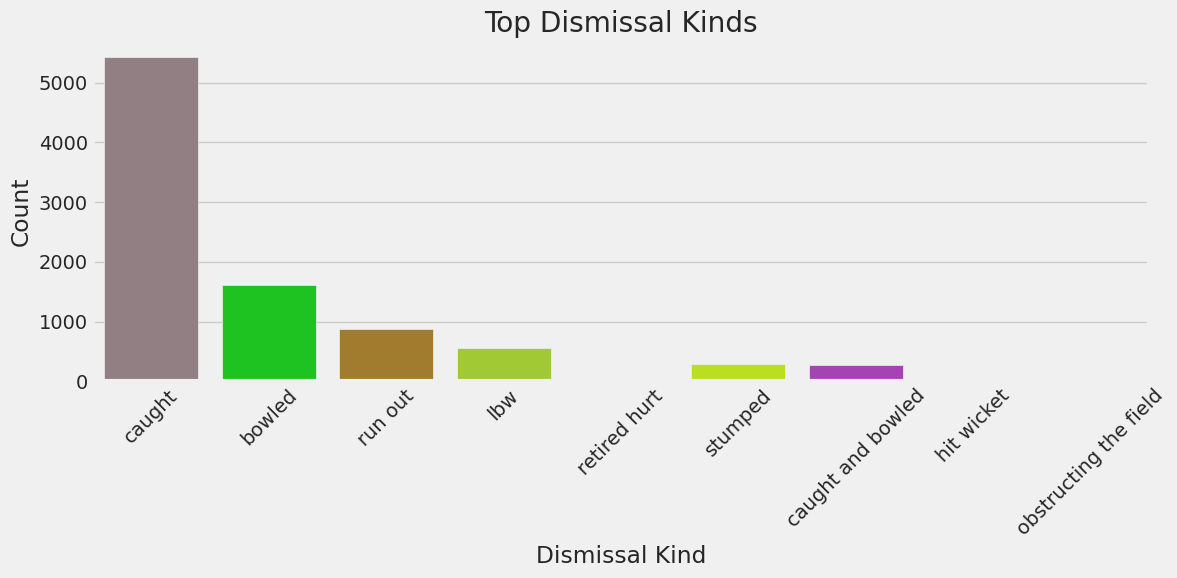

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind',data=deliveries,palette=random_colors(len(deliveries['dismissal_kind'].value_counts())))
plt.title('Top Dismissal Kinds')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


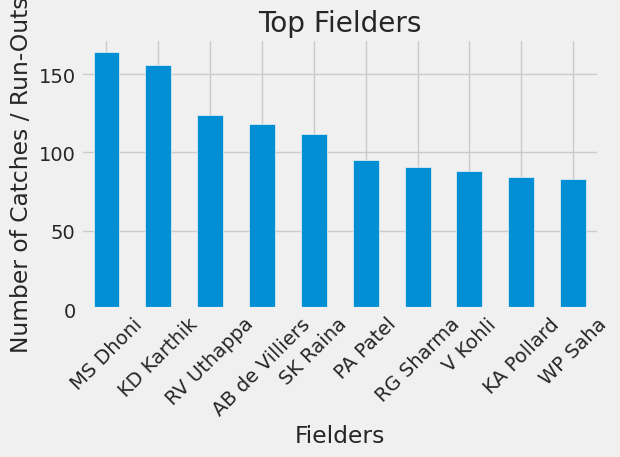

In [36]:
deliveries['fielder'].value_counts()[:10].plot(kind='bar')
plt.title('Top Fielders')
plt.xlabel('Fielders')
plt.ylabel('Number of Catches / Run-Outs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

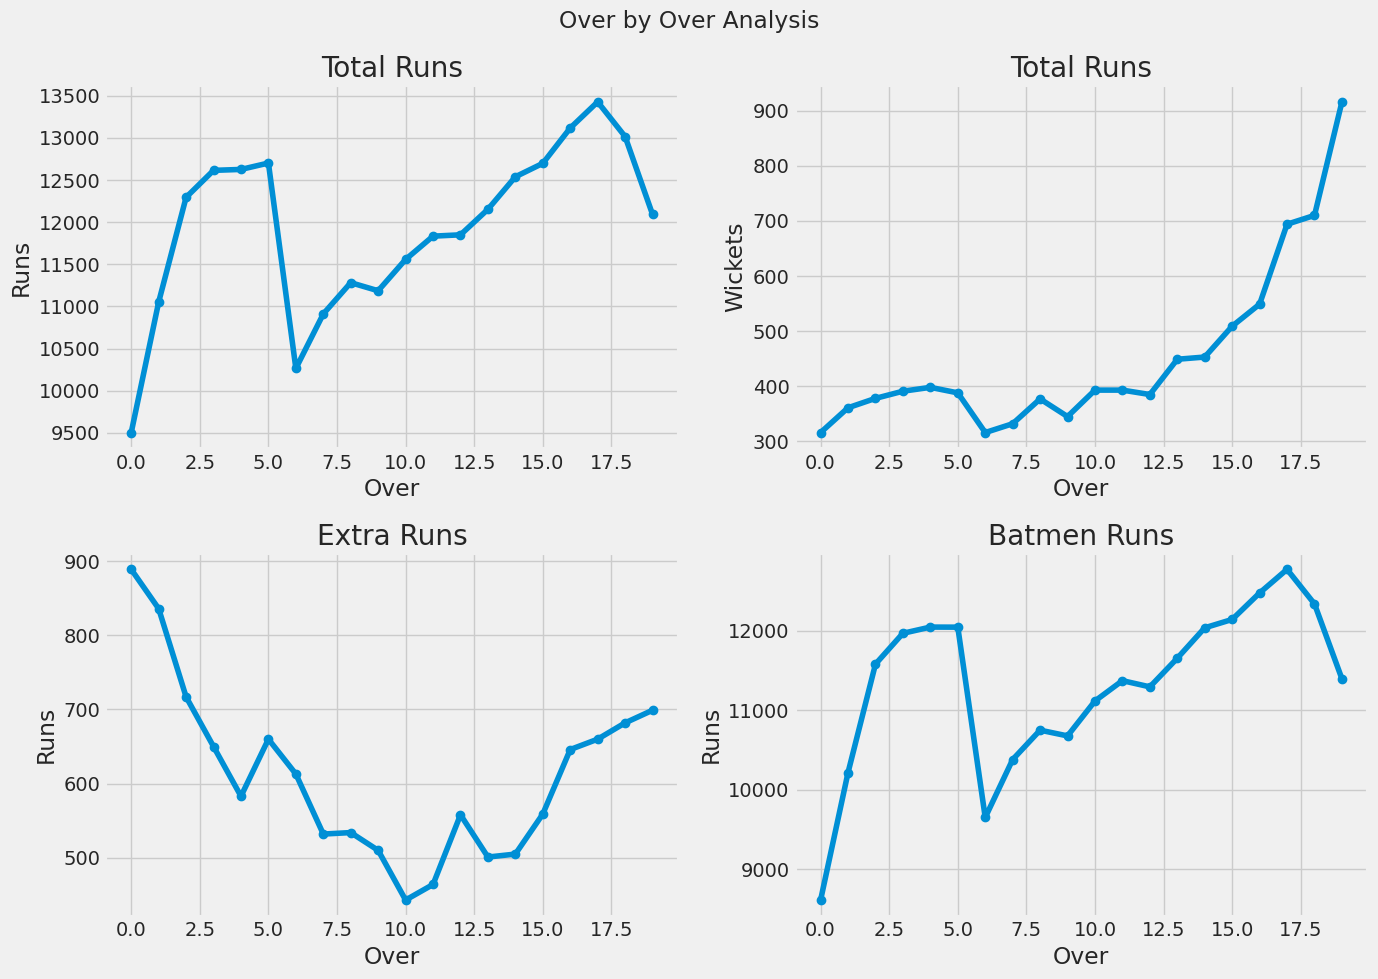

In [37]:
over_summary = deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()

fig, axes = plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Over by Over Analysis')


axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[0,1].set_title('Total Runs')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[1,0].set_title('Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batmen Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Runs')

plt.tight_layout()
plt.show()

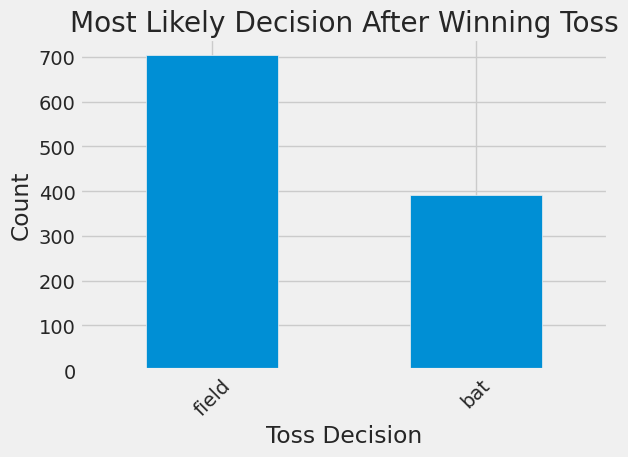

In [38]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most Likely Decision After Winning Toss')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [41]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)


In [43]:
runs = deliveries.groupby('batter')['batsman_runs'].sum()
valid_wickets = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
wickets = valid_wickets.groupby('bowler').size() * 20

mvp = (runs + wickets).fillna(0).sort_values(ascending=False).head(10)
print(mvp)


SK Raina      5876.0
V Kohli       5560.0
SR Watson     5508.0
RG Sharma     5364.0
CH Gayle      4901.0
S Dhawan      4724.0
DJ Bravo      4483.0
RA Jadeja     4179.0
YK Pathan     4062.0
KA Pollard    4017.0
dtype: float64


<ipython-input-50-9995a86949ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='pastel')


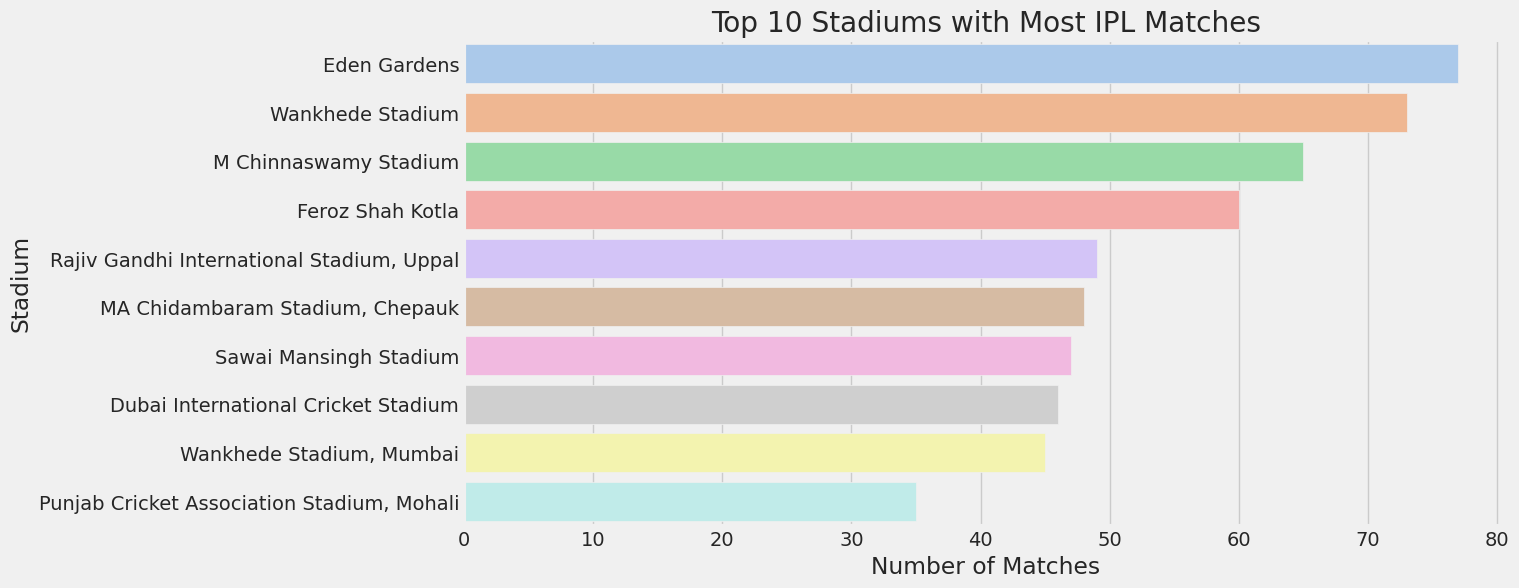

In [50]:
top_venues = matches['venue'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='pastel')
plt.title('Top 10 Stadiums with Most IPL Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Stadium')
plt.show()


<ipython-input-46-c5124f07cdef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette='magma')


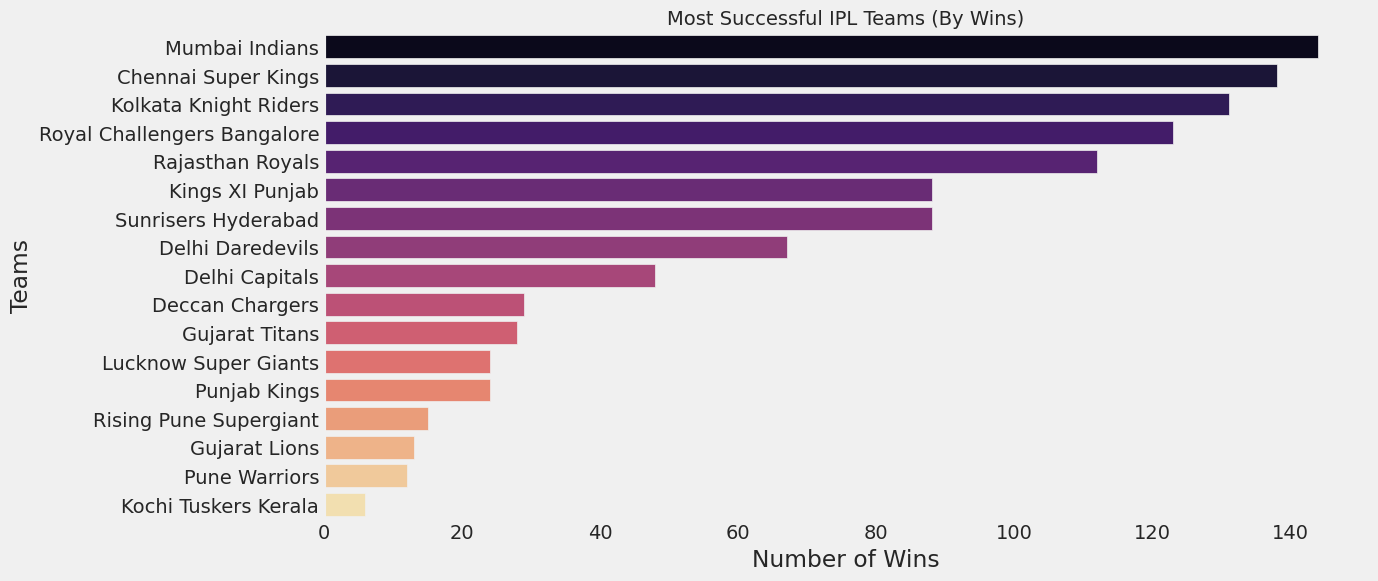

In [46]:
team_wins = matches['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette='magma')

plt.title('Most Successful IPL Teams (By Wins)', fontsize=14)
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.grid(axis='x')
plt.show()


<ipython-input-47-e335477d4d45>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_counts.index.map({True: 'Yes', False: 'No'}), y=result_counts.values, palette='coolwarm')


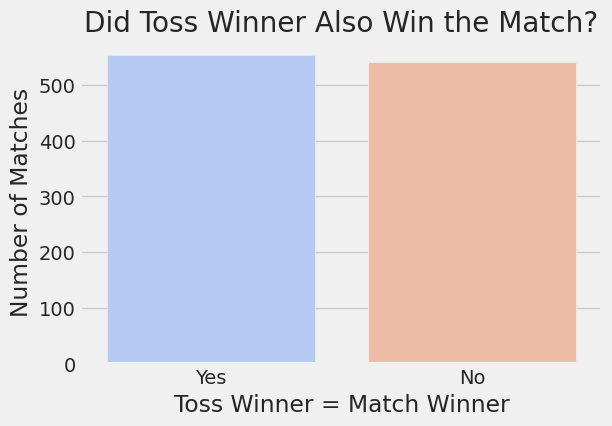

In [47]:
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']
result_counts = matches['toss_win_match_win'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=result_counts.index.map({True: 'Yes', False: 'No'}), y=result_counts.values, palette='coolwarm')

plt.title('Did Toss Winner Also Win the Match?')
plt.xlabel('Toss Winner = Match Winner')
plt.ylabel('Number of Matches')
plt.show()


<ipython-input-48-020bc735306c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fifty_plus_counts.values, y=fifty_plus_counts.index, palette='crest')


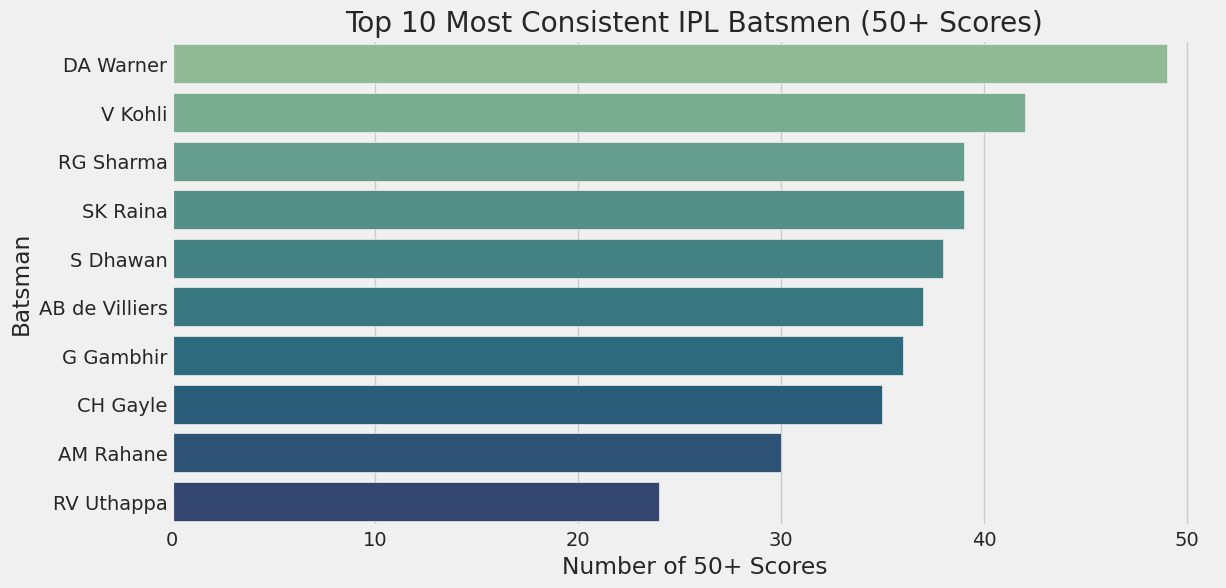

In [48]:
fifties = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
fifties = fifties[fifties['batsman_runs'] >= 50]

fifty_plus_counts = fifties['batter'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=fifty_plus_counts.values, y=fifty_plus_counts.index, palette='crest')
plt.title('Top 10 Most Consistent IPL Batsmen (50+ Scores)')
plt.xlabel('Number of 50+ Scores')
plt.ylabel('Batsman')
plt.show()


<ipython-input-49-02cbd4bcd5eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='flare')


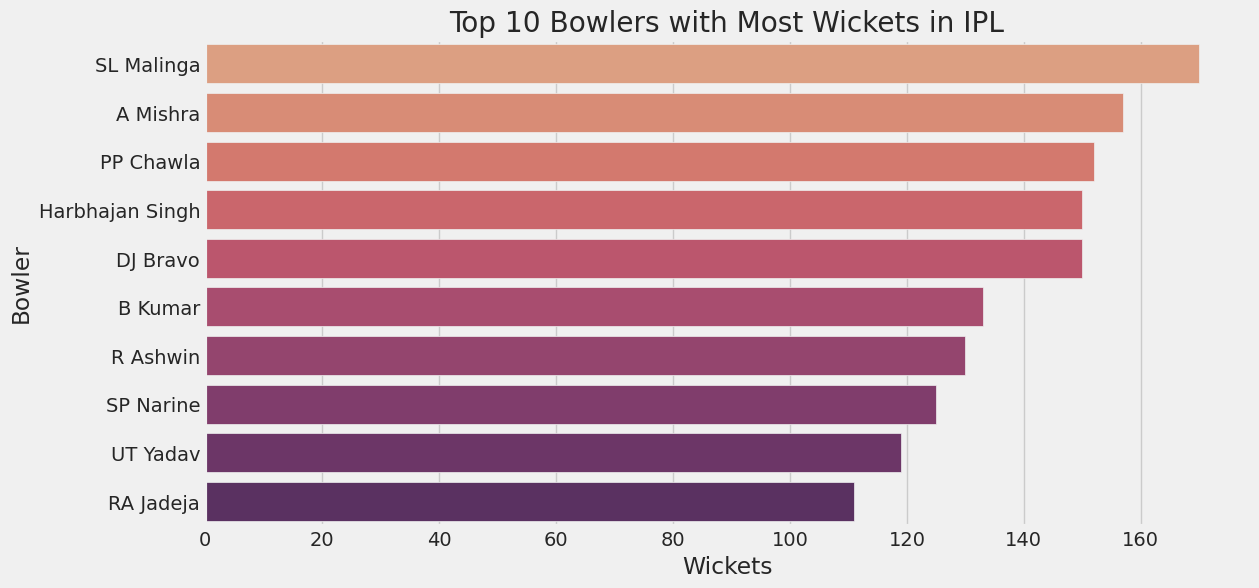

In [49]:
valid_dismissals = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
top_bowlers = valid_dismissals['bowler'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='flare')
plt.title('Top 10 Bowlers with Most Wickets in IPL')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()


In [51]:
team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()
total_matches_played = (team1_counts + team2_counts).sort_values(ascending=False)
print("Total Matches Played by Each Team:\n")
print(total_matches_played)


Total Matches Played by Each Team:

Mumbai Indians                 261
Royal Challengers Bangalore    255
Kolkata Knight Riders          251
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
Name: count, dtype: int64


In [52]:
toss_wins = matches['toss_winner'].value_counts()
print("Toss Wins by Each Team:\n")
print(toss_wins)


Toss Wins by Each Team:

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Royal Challengers Bangalore    121
Rajasthan Royals               120
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Rising Pune Supergiant          13
Kochi Tuskers Kerala             8
Name: count, dtype: int64


In [53]:
player_awards = matches['player_of_match'].value_counts().head(10)
print("Top 10 Players with Most 'Player of the Match' Awards:\n")
print(player_awards)


Top 10 Players with Most 'Player of the Match' Awards:

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


In [54]:
result_counts = matches['result'].value_counts()

print("Matches by Result Type:\n")
print(result_counts)


Matches by Result Type:

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


In [57]:
team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team1_matches = matches['team1'].value_counts()
team2_matches = matches['team2'].value_counts()
total_matches = team1_matches.add(team2_matches, fill_value=0)
avg_runs_per_match = (team_runs / total_matches).sort_values(ascending=False)

print("Average Runs per Match by Team:\n")
print(avg_runs_per_match)


Average Runs per Match by Team:

Gujarat Lions                  162.066667
Deccan Chargers                152.840000
Rising Pune Supergiant         151.100000
Delhi Daredevils               150.906832
Kings XI Punjab                148.884211
Pune Warriors                  138.217391
Kochi Tuskers Kerala           135.785714
Mumbai Indians                 116.532567
Chennai Super Kings            112.848739
Royal Challengers Bangalore    111.713725
Kolkata Knight Riders          110.820717
Rajasthan Royals               103.656109
Sunrisers Hyderabad             95.467033
Delhi Capitals                  34.747253
Gujarat Titans                        NaN
Lucknow Super Giants                  NaN
Punjab Kings                          NaN
dtype: float64
